<a href="https://colab.research.google.com/github/zhi-yu-lin/data-and-python/blob/main/Correlation_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces two new libraries:

**matplotlib**

A library of functions for plotting static, animated and interactive visualisations of data sets.  For ease, pandas use matplotlib for plotting a range of charts.

**scipy**

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`)

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up

In [12]:
import pandas as pd
from scipy.stats import linregress

# open the Excel file at the url above
url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
county_level_df = pd.read_excel(url, sheet_name='county-level')

# create a variable called x and assign the 'Age' column of the county_level_df dataframe
x = county_level_df['Age']

# create a variable called y and assign the 'Income' column of the county_level_df dataframe
y = county_level_df['Income']

# create a variable called regression and assign the result of running the linregress function with x, y as its parameters ( linregress(x,y) )
regression = linregress(x,y)
# display the regression
regression

# display the slope & intercept & rvalue
regression.slope
regression.intercept
regression.rvalue


LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189, intercept_stderr=16.08233482195521)

### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Test output**:   
0.013558605755058871


In [17]:
url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
county_level_df = pd.read_excel(url, sheet_name='county-level')

x = county_level_df['Population']
y = county_level_df['Income']
regression = linregress(x,y)
regression.rvalue


0.11644142628402862

The correlation is only 0.12, which is quite low meaning we cannot use population to predict income.
<font color = 'Red'>
My output is different from yours. Why?

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [19]:
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
df = pd.read_csv(url)
x = df['Stress']
y = df['Wellbeing']
regression = linregress(x,y)
slope = regression.slope
intercepts = regression.intercept
r_sqr = regression.rvalue ** 2
print(regression)
print(r_sqr)

def significance_check(df):
  x = df['Stress']
  y = df['Wellbeing']
  regression = linregress(x,y)
  p = regression.pvalue
  if p < 0.05:
    print("model is significant, p < .05:", p)
  else:
    print("model is insignificant, p >= .05:", p)

significance_check(df)

LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022, intercept_stderr=2.4636244230057622)
0.4507725540176983
model is significant, p < .05: 6.084540561441803e-07


# Visualising the data
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use matplotlib, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 4 to 10 is in this [image](https://drive.google.com/file/d/1LYxLJyur_zgzvJcv_C1WGm21nf07ddY6/view?usp=sharing)

#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='Country Migration')
df


,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,Low Income,South Asia,0.19,0.16,0.11,-0.05,-0.02
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,Lower Middle Income,Sub-Saharan Africa,-0.01,0.04,0.11,-0.02,-0.06
3,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ar,Argentina,-38.416097,-63.616672,High Income,Latin America & Caribbean,0.16,0.18,0.04,0.01,0.23
4,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,am,Armenia,40.069099,45.038189,Upper Middle Income,Europe & Central Asia,0.10,0.05,0.03,-0.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,za,South Africa,-30.559482,22.937506,Upper Middle Income,Sub-Saharan Africa,-2.98,-11.79,-9.10,-12.08,-20.76
4144,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,-2.50,-2.49,-2.21,-1.68,-3.19
4145,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,gb,United Kingdom,55.378051,-3.435973,High Income,Europe & Central Asia,3.91,4.66,0.74,-0.66,-1.97
4146,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,us,United States,37.090240,-95.712891,High Income,North America,38.60,37.76,10.09,6.06,5.25


### Exercise 4 - Line plot of net migration
---

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings)
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

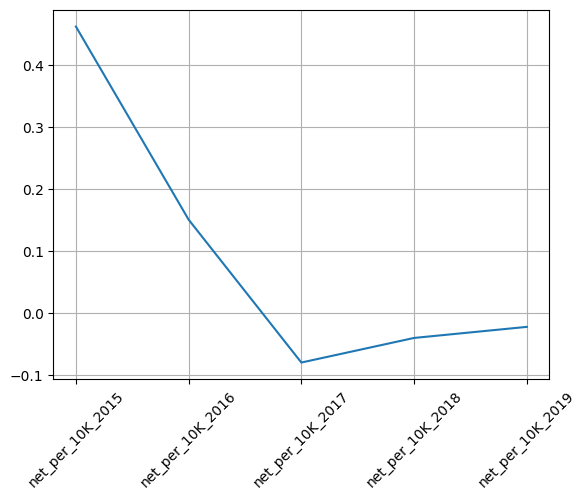

In [31]:
df_v2 = df[['net_per_10K_2015', 'net_per_10K_2016',	'net_per_10K_2017',	'net_per_10K_2018',	'net_per_10K_2019']]
means = df_v2.mean()
labels = means.keys()
plt.plot(labels, means)

plt.xticks(rotation=45)
plt.grid()
plt.show()

### Exercise 5 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  

* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis
* display your bar graph with plt.show

<BarContainer object of 5 artists>

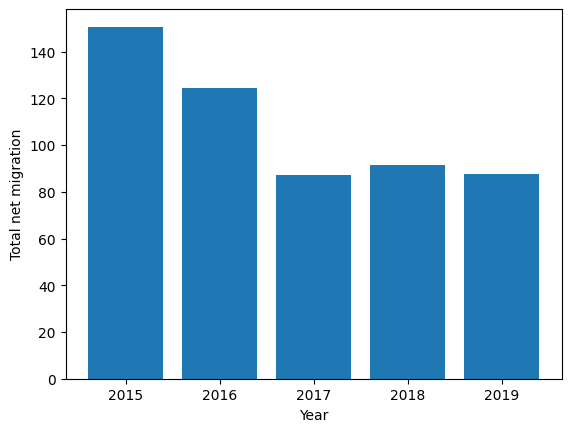

In [34]:
max = df_v2.max()
Year = ['2015','2016','2017','2018','2019']

plt.xlabel('Year')
plt.ylabel('Total net migration')
plt.bar(Year, max)


### Exercise 6 - creating a bar graph using grouped data
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`'
* extract your labels (x) using the .keys() function
* use the plt.barh(x, y) to create a horizontal bar graph
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

In [56]:
means = df[['net_per_10K_2019', 'target_country_wb_income']].groupby('target_country_wb_income').mean()
means
x = means.index
y = means['net_per_10K_2019']

plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Total net migration')
plt.title('Mean net_per_10K_2019 by Target Country Income')
plt.show()

,net_per_10K_2019
target_country_wb_income,
High Income,-0.467458
Low Income,0.072162
Lower Middle Income,0.940092
Upper Middle Income,0.455128


<font color = 'Red'>
why I cannot use .keys()? why means is a df not a dictionary?

# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

In [99]:
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data = pd.read_csv(url)

### Exercise 7 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 6 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




In [72]:
data = psych_data.groupby('firstlanguage')['Stress'].mean()
data
labels = data.keys()
plt.pie(data, labels = labels)
plt.show()

firstlanguage
Arabic      28.000000
Burmese     20.000000
Chinese     22.888889
German       3.000000
Greek       32.000000
Hindi       17.000000
Japanese    14.000000
Romanian    27.000000
Slovak      21.000000
Name: Stress, dtype: float64

### Exercise 8 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median.

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels="Wellbeing") to create boxplot
*  show the boxplot

ValueError: ignored

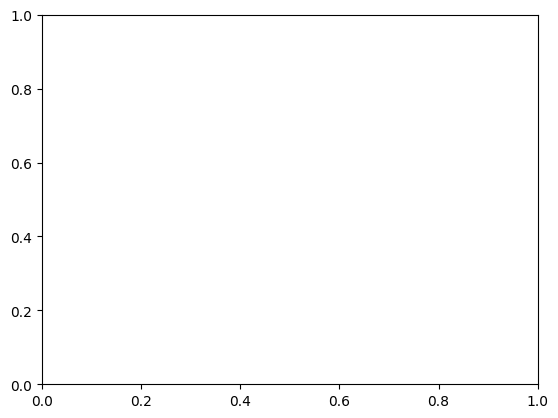

In [103]:
data = psych_data['Wellbeing']
data
plt.boxplot(data, labels="Wellbeing")
plt.show()

### Exercise 9 - Histograms of  age
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)`
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


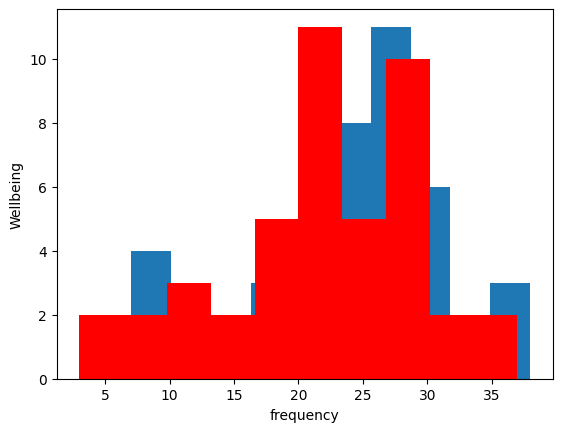

In [102]:
data = psych_data['Wellbeing']
data
plt.hist(data)
plt.xlabel('frequency')
plt.ylabel('Wellbeing')
plt.hist(x, color = 'red')
plt.show()

### Exercise 10 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Earlier in exercise 3, we found that Stress significantly predicted Wellbeing.

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   

* create a regression variable and assign the result of using linregress
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plt.plot(x, slope*x + intercept)

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




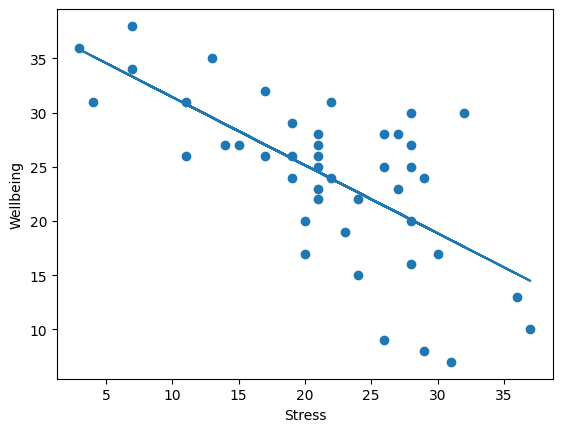

In [87]:
x = psych_data['Stress']
y = psych_data['Wellbeing']
plt.scatter(x,y)
plt.xlabel('Stress')
plt.ylabel('Wellbeing')

regression = linregress(x,y)
slope = regression.slope
intercept = regression.intercept
plt.plot(x, slope*x + intercept)
plt.show()

## Data story
---

Add your data story here

# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)